# Tokenizacja tekstu

Tokenizacja jest jednym z podstawowych etapów wstępnego przetwarzania tekstu.  Celem **tokenizacji** jest podział teksu na sekwencję mniejszych fragmentów zwanych tokenami. **Token** najczęściej odpowiadaja pojedynczym słowom, liczbom i znakom interpunkcyjnym.



## spaCy

### Przygotowanie

*   Będziemy korzystać z modelu *pl_core_news_sm*
*   Model wymaga spaCy w wersji 2.3



In [ ]:
!pip install spacy -U

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.3)


In [ ]:
!python -m spacy download pl_core_news_sm
!python -m spacy link pl_core_news_sm pl_core_news_sm -f

✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_core_news_sm
You can now load the model via spacy.load('pl_core_news_sm')


In [ ]:
import spacy
nlp = spacy.load('pl_core_news_sm')

### Przetwarzanie tekstu

In [ ]:
text = "Adam Mickiewicz żył w latach 1798-1855."

doc = nlp(text)

In [ ]:
print(f"Liczba tokenów: {len(doc)}")

print("---")
print(*doc, sep="\n")

Liczba tokenów: 9
---
Adam
Mickiewicz
żył
w
latach
1798
-
1855
.


In [ ]:
for token in doc:
  print(f"{token.text:<10}  {len(token.whitespace_)}  {token.text_with_ws:<12}  {token.orth:<22} {token.orth_}")

Adam        1  Adam          14264057329400597350   Adam
Mickiewicz  1  Mickiewicz    4205735127482439197    Mickiewicz
żył         1  żył           17463462916583227822   żył
w           1  w             260667111241363922     w
latach      1  latach        8838775445208903749    latach
1798        0  1798          9526162792521487386    1798
-           0  -             9153284864653046197    -
1855        0  1855          9650684165435343232    1855
.           0  .             12646065887601541794   .


In [ ]:
"".join([t.text_with_ws for t in doc]) == text

True

In [ ]:
doc.vocab[4205735127482439197].text

'Mickiewicz'

In [ ]:
len(doc.vocab)

146

### Tokenizacja, a potok przetwarzania

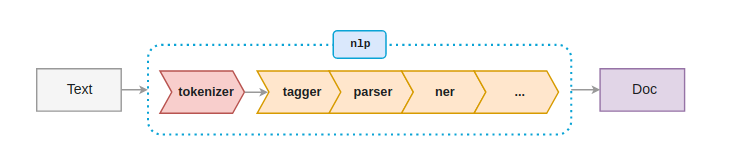

In [ ]:
print(nlp.pipe_names)

['tagger', 'parser', 'ner']


In [ ]:
doc = nlp(text, disable=["tagger", "parser", "ner"])

print(*doc, sep="\n")

Adam
Mickiewicz
żył
w
latach
1798
-
1855
.


In [ ]:
text_long = """Nagietek polny (Calendula arvensis M.Bieb.) – gatunek rośliny 
jednorocznej należącej do rodziny astrowatych (Asteraceae). Występuje w basenie 
Morza Śródziemnego, na wyspach Makaronezji oraz w południowo-zachodniej Azji 
sięgając tam na wschodzie po Turkmenistan. W Europie sięga na północ po Belgię, 
Niemcy, Węgry i Ukrainę. W dawnych granicach Polski notowany był jako bardzo 
rzadki chwast na Podolu i południowym Wołyniu. We współczesnych granicach 
notowany jest bardzo rzadko, przy czym określany jest różnie – jako zadomowiony 
składnik flory lub pojawiający się tylko przejściowo (efemerofit). Jako gatunek 
introdukowany rośnie także w Kalifornii, Południowej Afryce, Australii 
i Nowej Zelandii, Korei i Ameryce Południowej."""
print(len(text_long))

727


In [ ]:
%%time
for n in range(10):
  doc = nlp(text_long)
print(len(doc))

122
CPU times: user 233 ms, sys: 0 ns, total: 233 ms
Wall time: 240 ms


In [ ]:
%%time
for n in range(10):
  doc = nlp(text_long, disable=["tagger", "parser", "ner"])
print(len(doc))

122
CPU times: user 913 µs, sys: 0 ns, total: 913 µs
Wall time: 843 µs


### Zasady tokenizacji

**"Let\'s go to N.Y.!"**

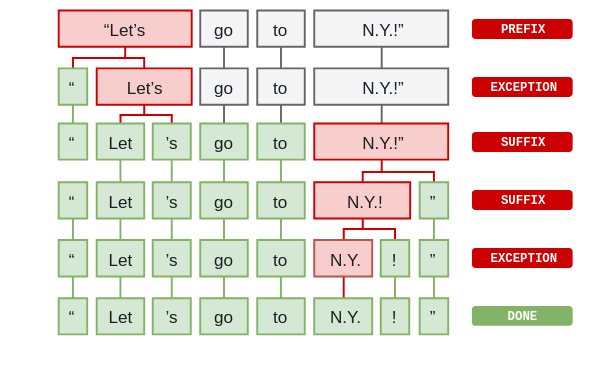



In [ ]:
tok_exp = nlp.tokenizer.explain(text)

for rule, token in tok_exp:
    print(f"{token:<10} {rule}")

Adam       TOKEN
Mickiewicz TOKEN
żył        TOKEN
w          TOKEN
latach     TOKEN
1798       TOKEN
-          INFIX
1855       TOKEN
.          SUFFIX


In [ ]:
for r, t in nlp.tokenizer.explain("Wyślij maila o 12:00 na adress marek.nowak@mail.pl"):
    print(f"{t:<10} {r}")

Wyślij     TOKEN
maila      TOKEN
o          TOKEN
12:00      TOKEN
na         TOKEN
adress     TOKEN
marek.nowak@mail.pl URL_MATCH


In [ ]:
for r, t in nlp.tokenizer.explain("Interesuje Was #DeepLearning i #MachineLearning?"):
    print(f"{t:<15} {r}")

Interesuje      TOKEN
Was             TOKEN
#               PREFIX
DeepLearning    TOKEN
i               TOKEN
#               PREFIX
MachineLearning TOKEN
?               SUFFIX


In [ ]:
for r, t in nlp.tokenizer.explain("Najnowszy odcinek podcastu @StacjaIT na stronie stacja.it :-)"):
    print(f"{t:<10} {r}")

Najnowszy  TOKEN
odcinek    TOKEN
podcastu   TOKEN
@StacjaIT  TOKEN
na         TOKEN
stronie    TOKEN
stacja.it  URL_MATCH
:-)        SPECIAL-1


In [ ]:
print(*nlp.tokenizer.rules)

	 
   ") ' '' (*_*) (-8 (-: (-; (-_-) (._.) (: (; (= (>_<) (^_^) (o: (¬_¬) (ಠ_ಠ) (╯°□°）╯︵┻━┻ )-: ): -_- -__- 0.0 0.o 0_0 0_o 8) 8-) 8-D 8D :'( :') :'-( :'-) :( :(( :((( :() :) :)) :))) :* :-( :-(( :-((( :-) :-)) :-))) :-* :-/ :-0 :-3 :-> :-D :-O :-P :-X :-] :-o :-p :-x :-| :-} :/ :0 :1 :3 :> :D :O :P :X :] :o :o) :p :x :| :} ;) ;-) ;-D ;D ;_; <.< </3 <3 <33 <333 <space> =( =) =/ =3 =D =| >.< >.> >:( >:o ><(((*> @_@ C++ O.O O.o O_O O_o V.V V_V XD XDD [-: [: \") \n \t ^_^ ^__^ ^___^ o.0 o.O o.o o_0 o_O o_o v.v v_v xD xDD   ¯\(ツ)/¯ ಠ_ಠ ಠ︵ಠ —


### Ograniczenia

In [ ]:
print(*nlp("Adam Mickiewicz żył w latach 1798-1855."), sep="\n")

Adam
Mickiewicz
żył
w
latach
1798
-
1855
.


In [ ]:
print(*nlp("Adam  Mickiewicz żył w latach 1798 -1855."), sep="\n")

Adam
 
Mickiewicz
żył
w
latach
1798
-1855
.


## NLTK

#### SpaceTokenizer

In [ ]:
from nltk.tokenize import SpaceTokenizer

space_tokenizer = SpaceTokenizer()
space_tokenizer.tokenize("Adam Mickiewicz żył w latach 1798-1855.")

['Adam', 'Mickiewicz', 'żył', 'w', 'latach', '1798-1855.']

#### WordPunctTokenizer

In [ ]:
from nltk.tokenize import WordPunctTokenizer

punct_tokenizer = WordPunctTokenizer()

In [ ]:
punct_tokenizer.tokenize("Adam Mickiewicz żył w latach 1798-1855.")

['Adam', 'Mickiewicz', 'żył', 'w', 'latach', '1798', '-', '1855', '.']

In [ ]:
punct_tokenizer.tokenize("Adam  Mickiewicz żył w latach 1798 -1855.")

['Adam', 'Mickiewicz', 'żył', 'w', 'latach', '1798', '-', '1855', '.']

#### TweetTokenizer

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [ ]:
tweet_tokenizer.tokenize("Interesuje Was #DeepLearning i #MachineLearning?")

['Interesuje', 'Was', '#DeepLearning', 'i', '#MachineLearning', '?']

In [ ]:
tweet_tokenizer.tokenize("Najnowszy odcinek podcastu @StacjaIT na stronie stacja.it :-)")

['Najnowszy',
 'odcinek',
 'podcastu',
 '@StacjaIT',
 'na',
 'stronie',
 'stacja.it',
 ':-)']

## Podsumowanie

*   NLTK i spaCy — tokenizacja regułowa,
*   NLTK
  * tokenizacja jest niezależnym modułem,
  * generyczne zasady tokenizacji,
  * moduły dedykowane określonym tekstom (np. tweety),
  * sekwencja znaków zamieniana jest na tablicę sekwencji,
*   spaCy
  * tokenizacja jest integralną częścią całego potoku przetwarzania,
  * sekwencja znaków zamieniana jest na tablicę obiektów `Token`.

